In [ ]:
#I built this after class according to the video, removed my comments in Lithuanian, maybe shouldn't have?
#It seems during weekdays I don't have enough time to go deeper and consolidate new concepts, and then 
#whatever I manage to catch up during weekend
#However starting Dec I am moving into part time work, so will have more time to give to Python & Co :)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [2]:
iris_data = pd.read_csv('iris-data.csv')
iris_data.shape

(150, 5)

In [3]:
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_data.tail()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris_data = pd.read_csv('iris-data.csv', na_values=['X', 'NA', 'N/A'])

In [8]:
iris_data.columns

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'class'],
      dtype='object')

''

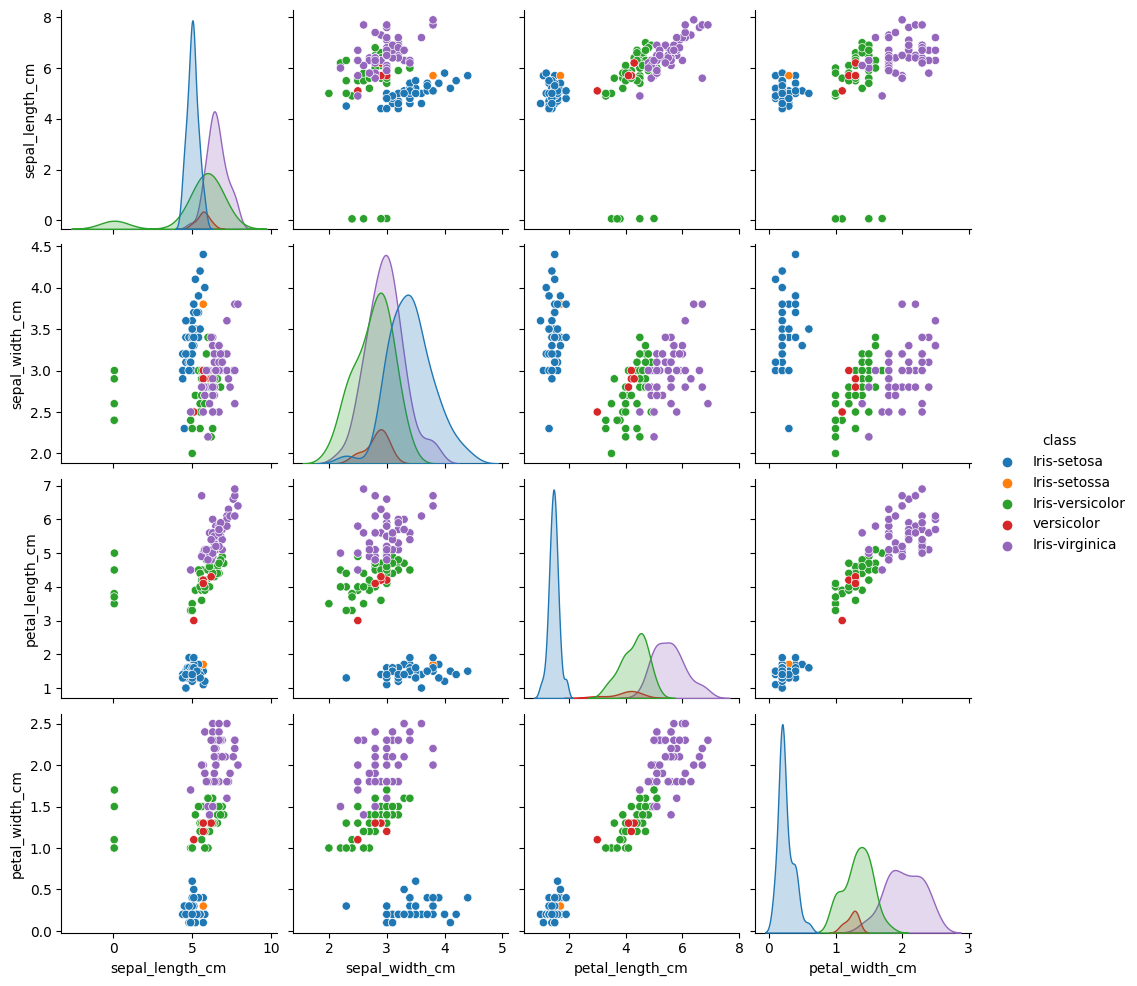

In [9]:
sb.pairplot(iris_data, hue='class')
;

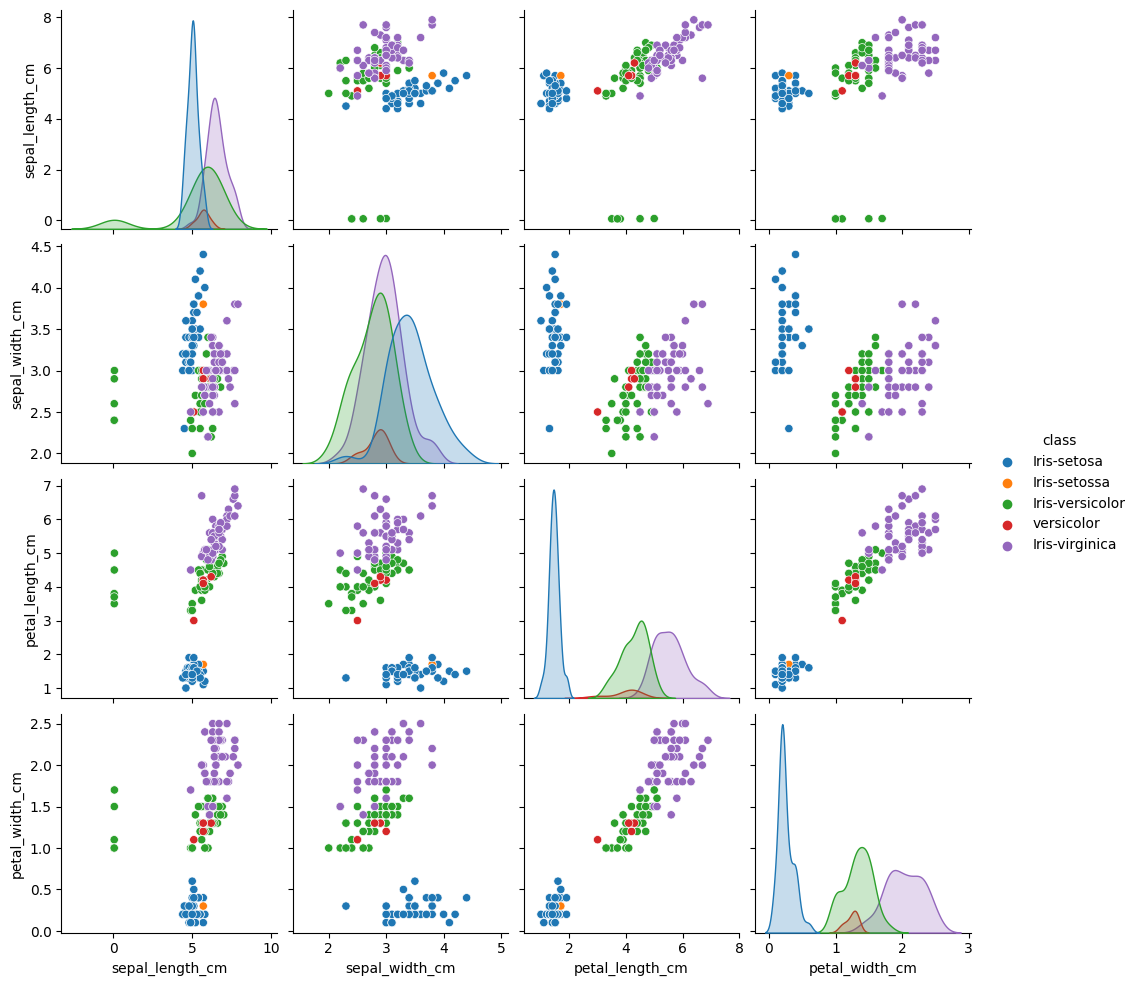

In [10]:
sb.pairplot(iris_data.dropna(), hue= 'class')

In [11]:
iris_data.describe(include=['O'])

,class
count,150
unique,5
top,Iris-virginica
freq,50


In [12]:
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [13]:
len(iris_data['class'].unique())

5

In [14]:
iris_data.loc[iris_data['class'] == 'versicolor', 'class']

95    versicolor
96    versicolor
97    versicolor
98    versicolor
99    versicolor
Name: class, dtype: object

In [15]:
iris_data.loc[iris_data['class']=='versicolor', 'class'] = 'Iris-versicolor'
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [16]:
iris_data.loc[iris_data['class']=='Iris-setossa', 'class'] = 'Iris-setosa'
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
iris_data.to_csv('iris-data-clean.csv', index=False)

In [18]:
import datetime

In [19]:
iris_data=pd.read_csv('iris-data-clean.csv')

In [20]:
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [21]:
setosa= iris_data[iris_data['class'] == 'Iris-setosa']
setosa.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
setosa.shape

(50, 5)

In [23]:
setosa.sort_values(by=['sepal_length_cm'], inplace=True)
setosa.head()

C:\Users\User\AppData\Local\Temp\ipykernel_11476\66101039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  setosa.sort_values(by=['sepal_length_cm'], inplace=True)


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
38,4.4,3.0,1.3,0.2,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
42,4.4,3.2,1.3,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [24]:
setosa[setosa['sepal_width_cm'] < 2.5]


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
41,4.5,2.3,1.3,0.3,Iris-setosa


In [25]:
iris_data.loc[iris_data['sepal_width_cm'] < 2.5]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
41,4.500,2.3,1.3,0.3,Iris-setosa
53,5.500,2.3,4.0,1.3,Iris-versicolor
57,4.900,2.4,3.3,1.0,Iris-versicolor
60,5.000,2.0,3.5,1.0,Iris-versicolor
62,6.000,2.2,4.0,1.0,Iris-versicolor
68,6.200,2.2,4.5,1.5,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor
87,6.300,2.3,4.4,1.3,Iris-versicolor
93,5.000,2.3,3.3,1.0,Iris-versicolor


In [26]:
smallpetals = iris_data.loc[(iris_data['sepal_width_cm'] < 2.5) & (iris_data['class'] == 'Iris-setosa')]
smallpetals

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
41,4.5,2.3,1.3,0.3,Iris-setosa


<AxesSubplot: >

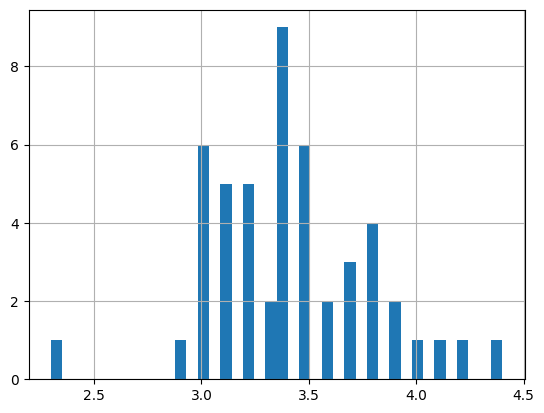

In [27]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist(bins=40)

In [28]:
iris_data=iris_data.loc[(iris_data['class'] != 'Iris-setosa') | (iris_data['sepal_width_cm'] >=2.5)]
iris_data.shape

(149, 5)

In [29]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') & (iris_data['sepal_length_cm'] < 1.0)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


''

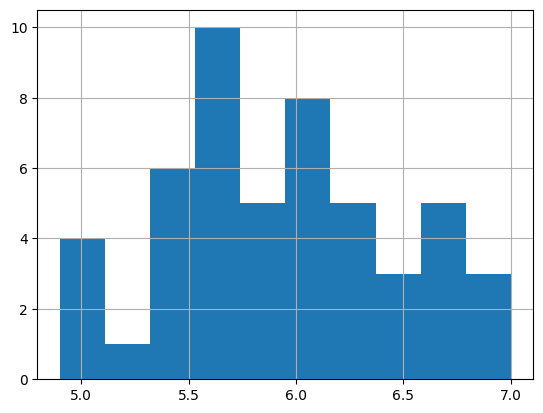

In [30]:
iris_data.loc[(iris_data['class'] == 'Iris-versicolor') &
                (iris_data['sepal_length_cm'] < 1.0),
                'sepal_length_cm'] *= 100.0
iris_data.loc[iris_data['class'] == 'Iris-versicolor', 'sepal_length_cm'].hist()
;

In [31]:
dfull=iris_data.notnull()
dfull.shape

(149, 5)

In [32]:
#galima ir taip
# iris_data.loc[(iris_data['sepal_length_cm'].isnull()) | ir tt]
#grazina 5 na values

In [33]:
iris_data[iris_data.isnull().sum(axis='columns') !=0]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [34]:
#https://www.geeksforgeeks.org/python-pandas-series-dataframe-any/#:~:text=Pandas%20any%20%28%29%20method%20is%20applicable%20both%20on,all%20values%20are%200%2C%20it%20will%20return%20False.
iris_data[iris_data.isnull().any(axis='columns')]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [35]:
setosa['petal_width_cm'].mean()

0.25111111111111106

In [36]:
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

0.24999999999999997

In [37]:
iris_data['petal_width_cm'].describe() #bet cia visos, ne tik setosa

count    144.000000
mean       1.243056
std        0.753607
min        0.100000
25%        0.400000
50%        1.350000
75%        1.800000
max        2.500000
Name: petal_width_cm, dtype: float64

In [38]:
setosa_avg=iris_data.loc[iris_data['class'] == 'Iris-setosa', 'petal_width_cm'].mean()

In [39]:
avg_petal_width = round(setosa_avg, 2)

In [40]:
iris_data.loc[(iris_data['class'] == 'Iris-setosa') & (iris_data['petal_width_cm'].isnull()), 'petal_width_cm'] = avg_petal_width

In [41]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,149.000000,149.000000,149.000000,149.000000
mean,5.847651,3.059732,3.775168,1.209732
std,0.799542,0.430104,1.758720,0.762191
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [42]:
iris_data.to_csv('iris-data-clean.csv', index=False)

In [ ]:
#jei noretu istrinti butu taip:
#df_without_na = iris_data.dropna()

In [43]:
import json

In [44]:
iris_data.to_json('iris-clean.json', indent=4)

In [45]:
df_json_pretty = json.dumps(json.loads(iris_data.to_json()), indent=4)
type(df_json_pretty)

str

In [46]:
print(df_json_pretty[:200])

{
    "sepal_length_cm": {
        "0": 5.1,
        "1": 4.9,
        "2": 4.7,
        "3": 4.6,
        "4": 5.0,
        "5": 5.4,
        "6": 4.6,
        "7": 5.0,
        "8": 4.4,
        "9"


In [47]:
iris_data_clean= pd.read_csv('iris-data-clean.csv')
iris_data_clean.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,149.000000,149.000000,149.000000,149.000000
mean,5.847651,3.059732,3.775168,1.209732
std,0.799542,0.430104,1.758720,0.762191
min,4.400000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


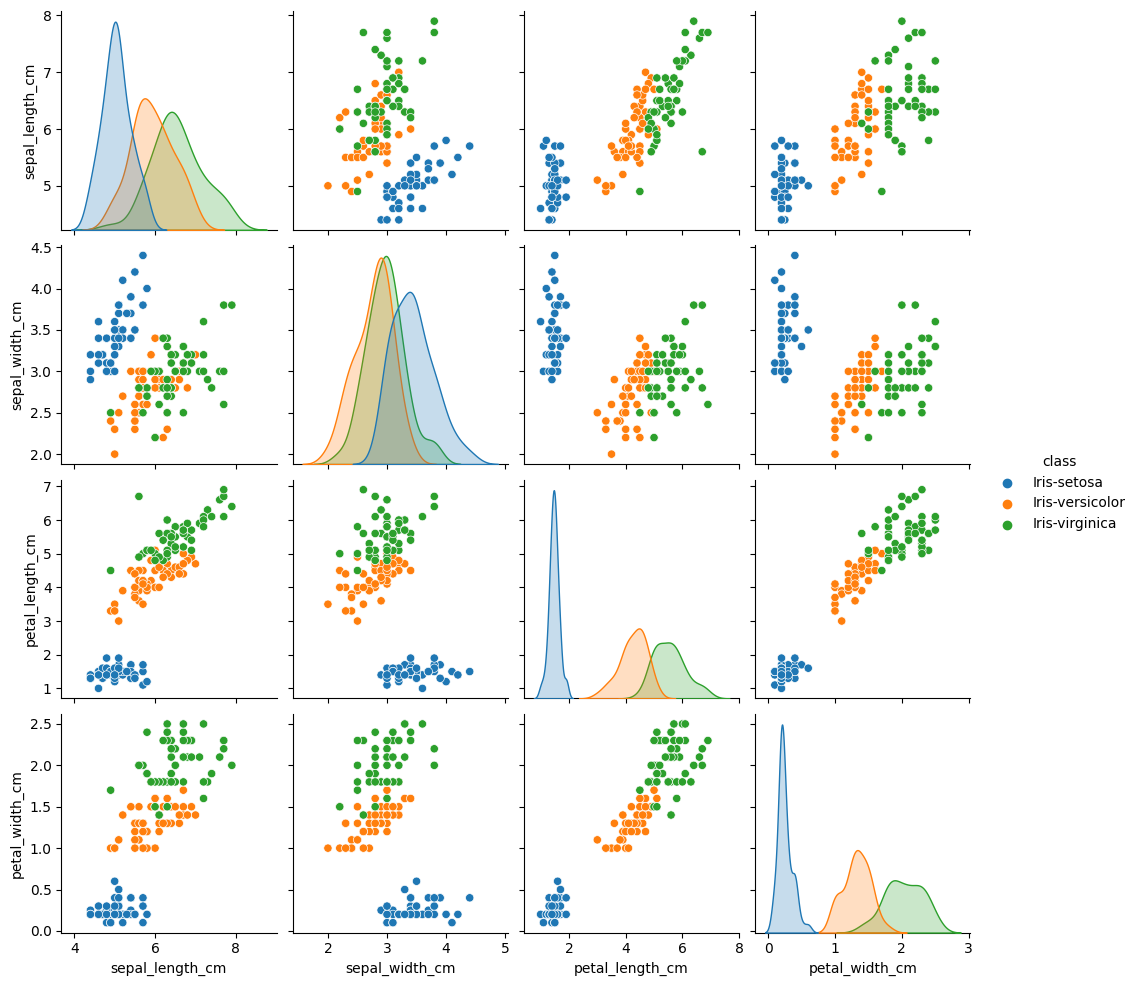

In [48]:
myplot=sb.pairplot(iris_data_clean, hue='class')
myplot.savefig('irises.png')

In [49]:
import scipy.stats as stats

In [50]:
stats.entropy(iris_data_clean['sepal_length_cm'])

4.9947332367061925

In [51]:
for col in iris_data.columns[:-1]:
    print('Entropy for: ', col, stats.entropy(iris_data[col].dropna()))

Entropy for:  sepal_length_cm 4.9947332367061925
Entropy for:  sepal_width_cm 4.994187360273029
Entropy for:  petal_length_cm 4.88306851089088
Entropy for:  petal_width_cm 4.76945055275522


In [52]:
assert 1 == 3

AssertionError: 

In [53]:
assert len(iris_data_clean['class'].unique()) == 3

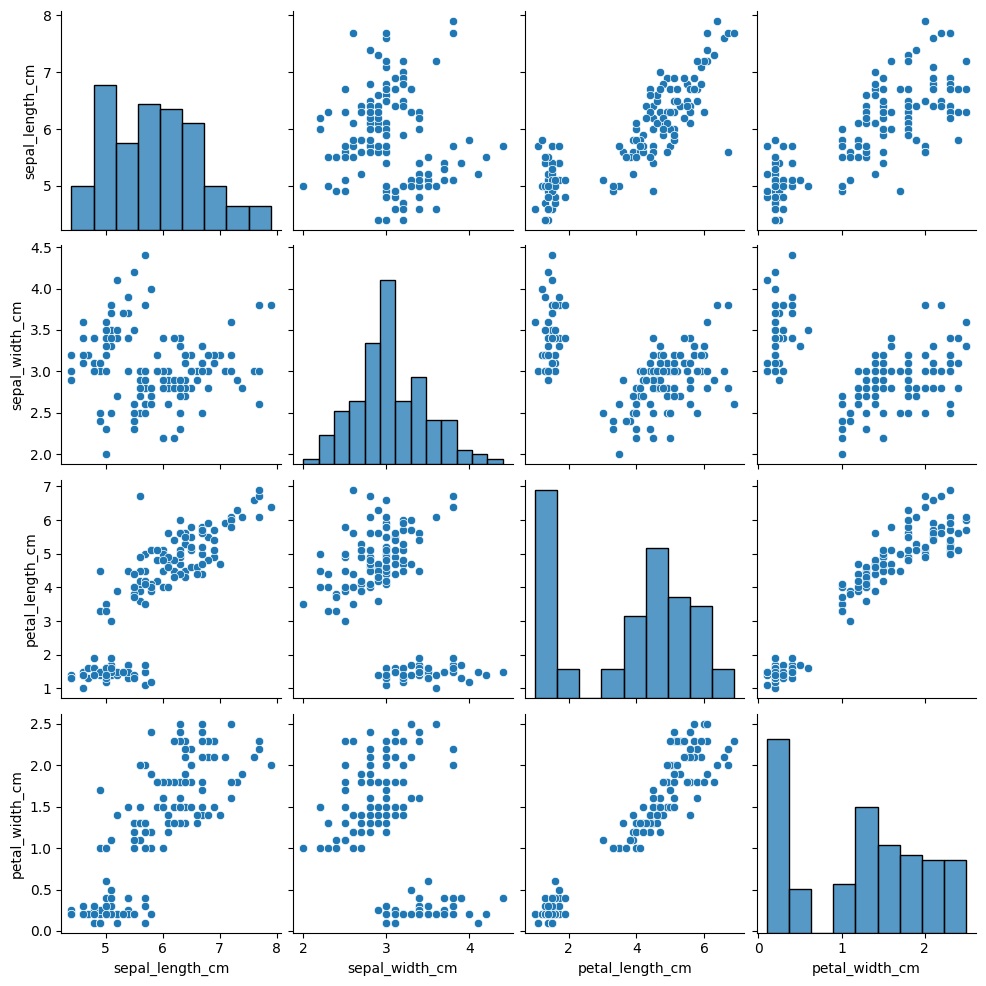

In [54]:
sb.pairplot(iris_data_clean)

<AxesSubplot: xlabel='class', ylabel='sepal_length_cm'>

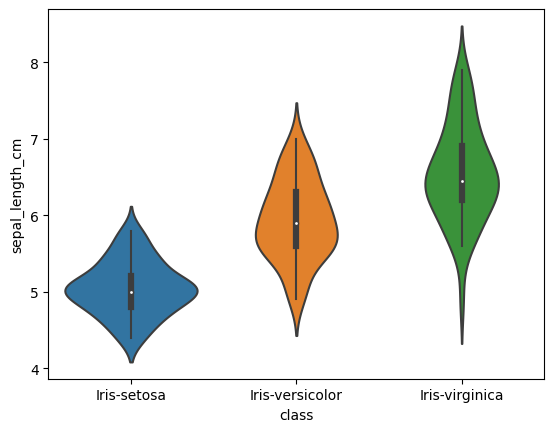

In [55]:
sb.violinplot(x='class', y='sepal_length_cm', data=iris_data_clean)

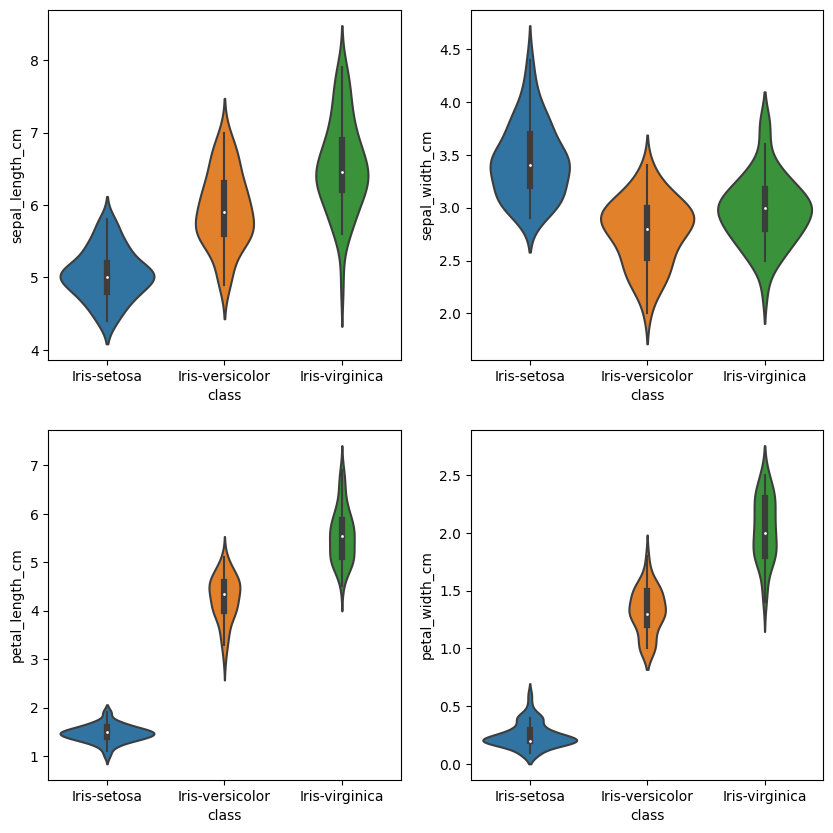

In [56]:

plt.figure(figsize=(10,10))
for column_index, column in enumerate(iris_data_clean.columns[:-1]):
    if column == 'class': #I found this if condition or absence of it has no effect here?
        continue 
    plt.subplot(2,2,column_index + 1)
    sb.violinplot(x='class', y=column, data=iris_data_clean)

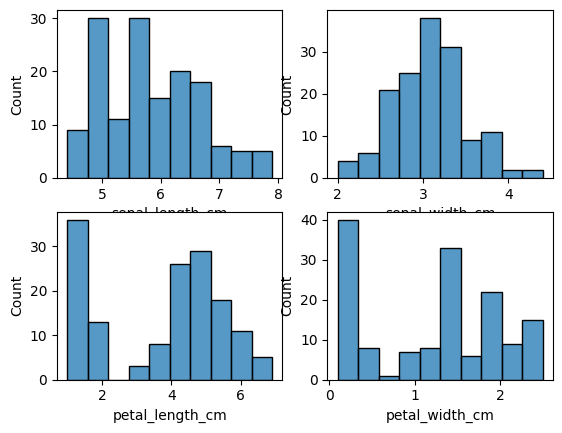

In [57]:
for column_index, column in enumerate(iris_data_clean.columns[:-1]):
    
    plt.subplot(2,2,column_index + 1)
    sb.histplot(data=iris_data_clean[column], bins=10)
    
    #basic for now, I'm catching up with Matplotlib